In [2]:
### Importing modules
import pandas as pd 
import numpy as np
import os

In [83]:
### Missing IDs not present in Giusy's table. To be removed from Zenodo table!

IDs_to_remove = ['GSE30200','GSE92899','GSE100500','GSE14452','GSE27212' ,'GSE29110' ,'GSE30178' ,
       'GSE30180','GSE30213','GSE30214','GSE30215','GSE44294','GSE48087' ,'GSE7010','GSE155027',
       'GSE143717','GSE101992','GSE125742_HBMSC','GSE125742_HUVEC','GSE125742_mouse_bone','GSE125742_mouse_kidney',
       'GSE125742_mouse_heart','GSE125742_mouse_liver','GSE125742_mouse_muscle','GSE125742_mouse_MuscleStemCell',
       'GSE125742_mouse_PBMC','GSE125742_mouse_spleen','GSE153419','GSE86339_C5796','GSE86339_DBA2']

### All folders with these IDs have been removed to another folder called Removed_IDs 
### The script is not run on RNAseq because all its IDs are not ofund in Giusy's table!

TableI: Ensembl_ID + Nanomaterial_Dose_TimePoint + Score
TableII: GSE_experiment + Nanomaterial_Dose_TimePoint 

In [4]:
### Define a function which given the root directory, it returns 2 dataframes (table1 and table2). It loops recursively through all groups folders
### and it incorporates only the files which have differentially expressed genes. 


def table(rootdir):
    #i = 0 
    small_df_names = []
    d = {'GSE':[],'nanomaterial':[]}
    for subdir, dirs,files in os.walk(rootdir):
        for file in files:
            if file.endswith('_Filtered_DEG.xlsx'):
                #i = i +1 
                
        ### Open multiple sheets in the same excel file. 
                xls = pd.ExcelFile(subdir + '/'+ file)
                sheets = pd.read_excel(xls,None) #If None is specified, all sheets are returned, as a {sheet_name:dataframe} dictionary.
                
                for key in sheets.keys():
                    #print(key)
                    nanomaterial = key.split('-')[0]
                    
        ### Define a dataframe with only the columns of interest
                    small_df = pd.DataFrame(sheets[key]['ID'])
                    small_df['Nanomaterial_Dose_TimePoint'] = nanomaterial
                   # if sheets[key]['adj.P.Val'].all() == False: 
                    #    print(subdir, file,key, 'file with Adjusted p-value 0') ### With MicroArray no 0s! With RNAseq yes!
                    small_df['logFC*-log(Adj_pvalue)'] = sheets[key]['logFC']* -(np.log(sheets[key]['adj.P.Val'])) ### Logarithm in base 10 for Adjusted p-value. LogFC is already in base 2! 
    
        ### Define dataframe with column GSE and many rows as the Nanomaterials for that GSE
                    #print(file[:-18], 'GSE')
                    d['GSE'].append(file[:-18])
                    d['nanomaterial'].append(nanomaterial)
                    
                    #print(d) 
        ### Append the small dataframes to a list 
                    small_df_names.append(small_df)
            
    ### Concatenate the small dataframes in a bigger dataframe
    large_df = pd.concat(small_df_names, ignore_index=True)
    
    ### Convert dictionary d into pandas dataframe 
    second_df= pd.DataFrame(d)
    
    print(i)
    
    return(large_df,second_df)
          
        
    

In [5]:
Microarray_rootdir = 'C:/Users/Gaia/Desktop/UNI/TIROCINIO/ENM_public_data/ENM_public_data/Microarray'
df_MicroArray_I, df_MicroArray_II = table(Microarray_rootdir)


67


In [108]:
df_MicroArray_I

,ID,Nanomaterial_Dose_TimePoint,logFC*-log(Adj_pvalue)
0,ENSMUSG00000028255,crocidolite_120ug_1mo,117.587943
1,ENSMUSG00000063779,crocidolite_120ug_1mo,131.422861
2,ENSMUSG00000049723,crocidolite_120ug_1mo,141.263050
3,ENSMUSG00000047222,crocidolite_120ug_1mo,87.581853
4,ENSMUSG00000090675,crocidolite_120ug_1mo,61.547793
...,...,...,...
233276,ENSG00000132275,THP1_GONH2,-4.390769
233277,ENSG00000105278,THP1_GONH2,6.165554
233278,ENSG00000105810,THP1_GONH2,-5.120549
233279,ENSG00000164953,THP1_GONH2,5.333206


In [109]:
df_MicroArray_II

,GSE,nanomaterial
0,GSE112780,crocidolite_120ug_1mo
1,GSE112780,MWCNT_10ug_1mo
2,GSE112780,MWCNT_40ug_1mo
3,GSE112780,MWCNT_80ug_1mo
4,GSE112780,crocidolite_120ug_6mo
...,...,...
402,GSE96720,GQD
403,GSE99929_Jurkat,Jurkat_GO
404,GSE99929_Jurkat,Jurkat_GONH2
405,GSE99929_THP1,THP1_GO


In [95]:
df_MicroArray_I.to_excel('C:/Users/Gaia/Desktop/UNI/TIROCINIO/MicroArray_GeneID_ENM.xlsx', index = False)

In [110]:
df_MicroArray_II.to_excel('C:/Users/Gaia/Desktop/UNI/TIROCINIO/MicroArray_GseID_ENM.xlsx', index = False)

Similarity matrix (nanomaterial_dose_time X nanomaterial_dose_time) based on the percentage of differentially expressed genes over the total. 

In [3]:
import sklearn
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
Microarray_rootdir = 'C:/Users/Gaia/Desktop/UNI/TIROCINIO/ENM_public_data/ENM_public_data/Microarray/'           

In [3]:
### Define function which given a .txt file returns a lists with all GSE IDs for a given species.  
def file_processing(file):
    l = []
    for line in file: 
        line = line.rstrip()
        l.append(line)
    return l 

In [6]:
### Call file_processing function for GSE_human file 
GSE_human = open('C:/Users/Gaia/Desktop/UNI/TIROCINIO/GSE_human.txt','r')
l_human = file_processing(GSE_human)

In [7]:
### 38 Human GSEs. 
len(l_human)

38

In [8]:
### Define a function which given the file GSE_human.txt, it returns two dictionaries with keys Nanomaterial_Dose_Time: one it stores the number of differentially expressed genes, the other the diff expressed genes.
### For each key a list of Ensembl IDs is returned. If there is already a Nanomaterial_Dose_Time in the dictionary, a new key is added to the dictionary. 

def nano_gene(Microarray_rootdir,l):
    d = {}
    i = 0
    count_dif_genes = {}
    for subdir, dirs,files in os.walk(Microarray_rootdir):
       # print(subdir,'subdir')
        starting_index = subdir.find('\\')
        if (starting_index != -1) and (subdir[starting_index+1 :-6] in l): 
            #print(subdir)
            for file in files:
                ### Open only files with Filtered Table
                if file.endswith('_Filtered_DEG.xlsx'):
                    #print(subdir,'filtered')
                    i = i+1
                    xls = pd.ExcelFile(subdir + '/'+ file)
                    #print(xls,'xls')
                    sheets = pd.read_excel(xls,None) #If None is specified, all sheets are returned, as a {sheet_name:dataframe} dictionary.
                    for nanomaterial_time_dose in sheets.keys(): ### keeping also control info! Maybe some nanomaterials have same time and same dose but different control timePoint!
                        
                        genes = sheets[nanomaterial_time_dose]['ID'].values.tolist() ### Convert the pandas dataframe with all genes into list!
                        genes = set(genes)    ### Convert it into a set 
                       # print(subdir[starting_index+1 :-6])
                        count_dif_genes[subdir[starting_index+1 :-6] + '_' + nanomaterial_time_dose] = len(genes)
                        d[subdir[starting_index+1 :-6] + '_' + nanomaterial_time_dose] = genes  
    #print(i)
    return d, count_dif_genes
    


In [9]:
d_human, count_dif_genes_human = nano_gene(Microarray_rootdir,l_human)

C:/Users/Gaia/Desktop/UNI/TIROCINIO/ENM_public_data/ENM_public_data/Microarray/IV\GSE45598_files
Does not have a Filtered File. Therefore the number of GSE included are 37 (instead of 38)!!!

In [10]:
### Define function that given 2 lists of Ensembl IDs, it converts them into a set and it returns their Jaccard score. 
#The major difference is that sets, unlike lists or tuples, cannot have multiple occurrences of the same element and store unordered values.

def jaccard_score(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))  
    return float((intersection) / union) 

In [11]:
### Define function which given the dictionary returns a pandas dataframe with Jaccard index. 

def similarity_matrix(A,d):
    row_index = 0 
    for row_key in d.keys():
        #print(row_key,'row key')
        column_index = 0 
        for column_key in d.keys():
            jaccard_index = jaccard_score(d[row_key], d[column_key])
            #print(jaccard_index,'Jaccard index')
            A[row_index,column_index] = round(jaccard_index,4)
            column_index += 1 
        #print(A[row_index])
        row_index += 1 

    return(A)


In [12]:
### Initialize numpy matrix with 0s 

len_d = len(d_human.keys())
#print(len_d)
keys = []
for key in d_human.keys():
    keys.append(key)


In [13]:
Zero_matrix = np.zeros((len_d,len_d))

Jaccard_matrix_human = similarity_matrix(Zero_matrix,d_human)

df_Jaccard_human = pd.DataFrame(Zero_matrix, index = keys,columns=keys)

In [14]:
df_Jaccard_human

,GSE127773_CuO_23_Healthy-control_Healthy,GSE127773_CuO_120_Healthy-control_Health,GSE127773_CuO_470_Healthy-control_Health,GSE127773_CuO_COOH_128_Healthy-control_H,GSE127773_CuO_COOH_495_Healthy-control_H,GSE127773_CuO_23_Asthmatic-control_Asth,GSE127773_CuO_120_Asthmatic-control_Asth,GSE127773_CuO_470_Asthmatic-control_Asth,GSE127773_CuO_COOH_32_Asthmatic-control_A,GSE127773_CuO_COOH_128_Asthmatic-control_,...,GSE45868_Eudragit_RS-control,GSE51661_PLGA_24h-control_24h,GSE82062_nanoSiO2-control,GSE92987_AuNPs-control,GSE92987_AuNPs_HDM2-control,GSE96720_GQD-control,GSE99929_Jurkat_Jurkat_GO-Jurkat_control,GSE99929_Jurkat_Jurkat_GONH2-Jurkat_control,GSE99929_THP1_THP1_GO-THP1_control,GSE99929_THP1_THP1_GONH2-THP1_control
GSE127773_CuO_23_Healthy-control_Healthy,1.0000,0.0144,0.0047,0.0741,0.0042,0.0510,0.0082,0.0053,0.0000,0.0111,...,0.0000,0.0071,0.0012,0.0015,0.0094,0.0023,0.0021,0.0000,0.0000,0.0015
GSE127773_CuO_120_Healthy-control_Health,0.0144,1.0000,0.1912,0.0067,0.2025,0.0882,0.3118,0.1960,0.0011,0.3294,...,0.0445,0.0080,0.0347,0.0396,0.0051,0.0619,0.0369,0.0000,0.0078,0.0293
GSE127773_CuO_470_Healthy-control_Health,0.0047,0.1912,1.0000,0.0016,0.5577,0.0217,0.3391,0.5514,0.0003,0.1817,...,0.0498,0.0056,0.0779,0.1446,0.0059,0.1821,0.0636,0.0005,0.0114,0.0563
GSE127773_CuO_COOH_128_Healthy-control_H,0.0741,0.0067,0.0016,1.0000,0.0019,0.0750,0.0041,0.0020,0.0000,0.0068,...,0.0014,0.0000,0.0003,0.0003,0.0000,0.0006,0.0000,0.0000,0.0000,0.0007
GSE127773_CuO_COOH_495_Healthy-control_H,0.0042,0.2025,0.5577,0.0019,1.0000,0.0257,0.3918,0.5377,0.0003,0.2137,...,0.0630,0.0072,0.0712,0.1278,0.0066,0.1561,0.0571,0.0006,0.0105,0.0489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSE96720_GQD-control,0.0023,0.0619,0.1821,0.0006,0.1561,0.0078,0.0888,0.1603,0.0001,0.0634,...,0.0441,0.0062,0.0834,0.2177,0.0061,1.0000,0.0665,0.0006,0.0127,0.0663
GSE99929_Jurkat_Jurkat_GO-Jurkat_control,0.0021,0.0369,0.0636,0.0000,0.0571,0.0068,0.0418,0.0631,0.0000,0.0343,...,0.0201,0.0020,0.0423,0.0626,0.0047,0.0665,1.0000,0.0092,0.0207,0.0786
GSE99929_Jurkat_Jurkat_GONH2-Jurkat_control,0.0000,0.0000,0.0005,0.0000,0.0006,0.0000,0.0000,0.0003,0.0000,0.0000,...,0.0013,0.0000,0.0012,0.0010,0.0000,0.0006,0.0092,1.0000,0.0035,0.0022
GSE99929_THP1_THP1_GO-THP1_control,0.0000,0.0078,0.0114,0.0000,0.0105,0.0029,0.0088,0.0114,0.0000,0.0114,...,0.0102,0.0026,0.0115,0.0123,0.0000,0.0127,0.0207,0.0035,1.0000,0.0500


In [15]:
### Write excel file with dataframe
df_Jaccard_human.to_excel('C:/Users/Gaia/Desktop/UNI/TIROCINIO/Jaccard_human.xlsx')

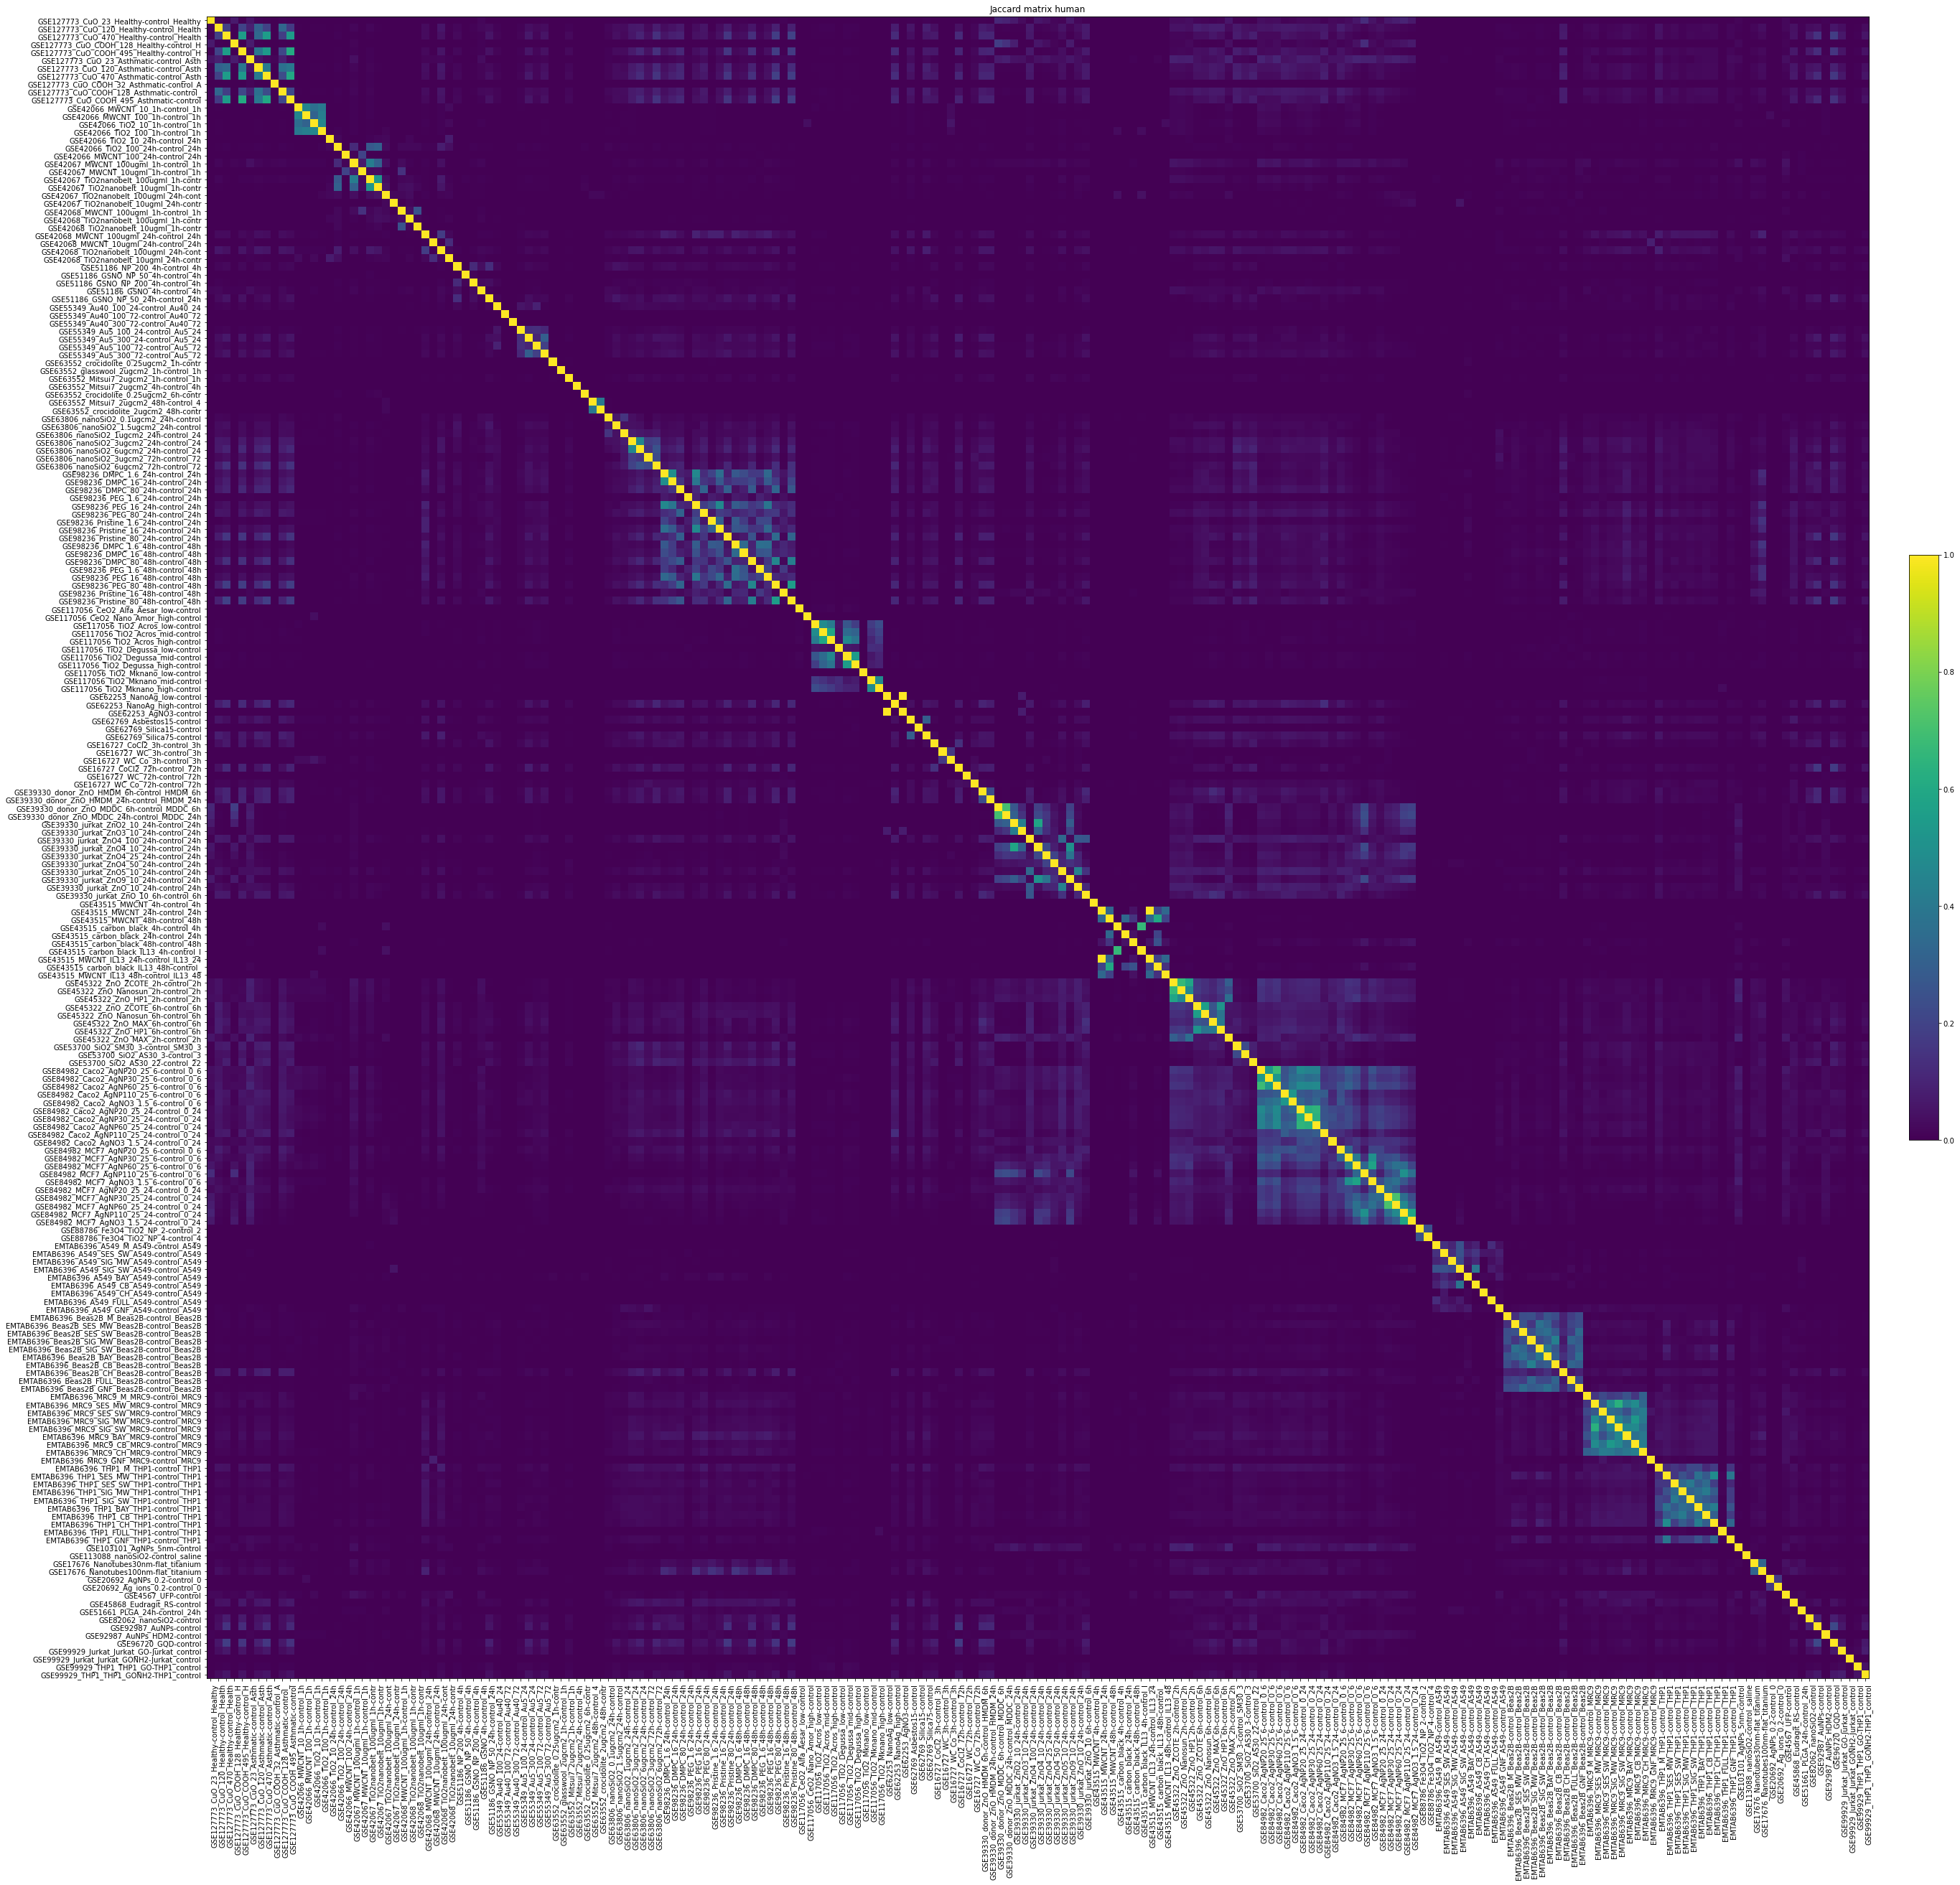

In [170]:
fig, ax = plt.subplots(figsize = (50,50))
im = ax.imshow(df_Jaccard_human)

# We want to show all ticks...
ax.set_xticks(np.arange(len(keys)))
ax.set_yticks(np.arange(len(keys)))
# ... and label them with the respective list entries
ax.set_xticklabels(keys)
ax.set_yticklabels(keys)

plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

fig.colorbar(im, ax=ax, shrink = 0.3, pad = 0.02)

plt.savefig('C:/Users/Gaia/Desktop/UNI/TIROCINIO/Jaccard_matrix_human.jpg') 
plt.title('Jaccard matrix human')
plt.show()



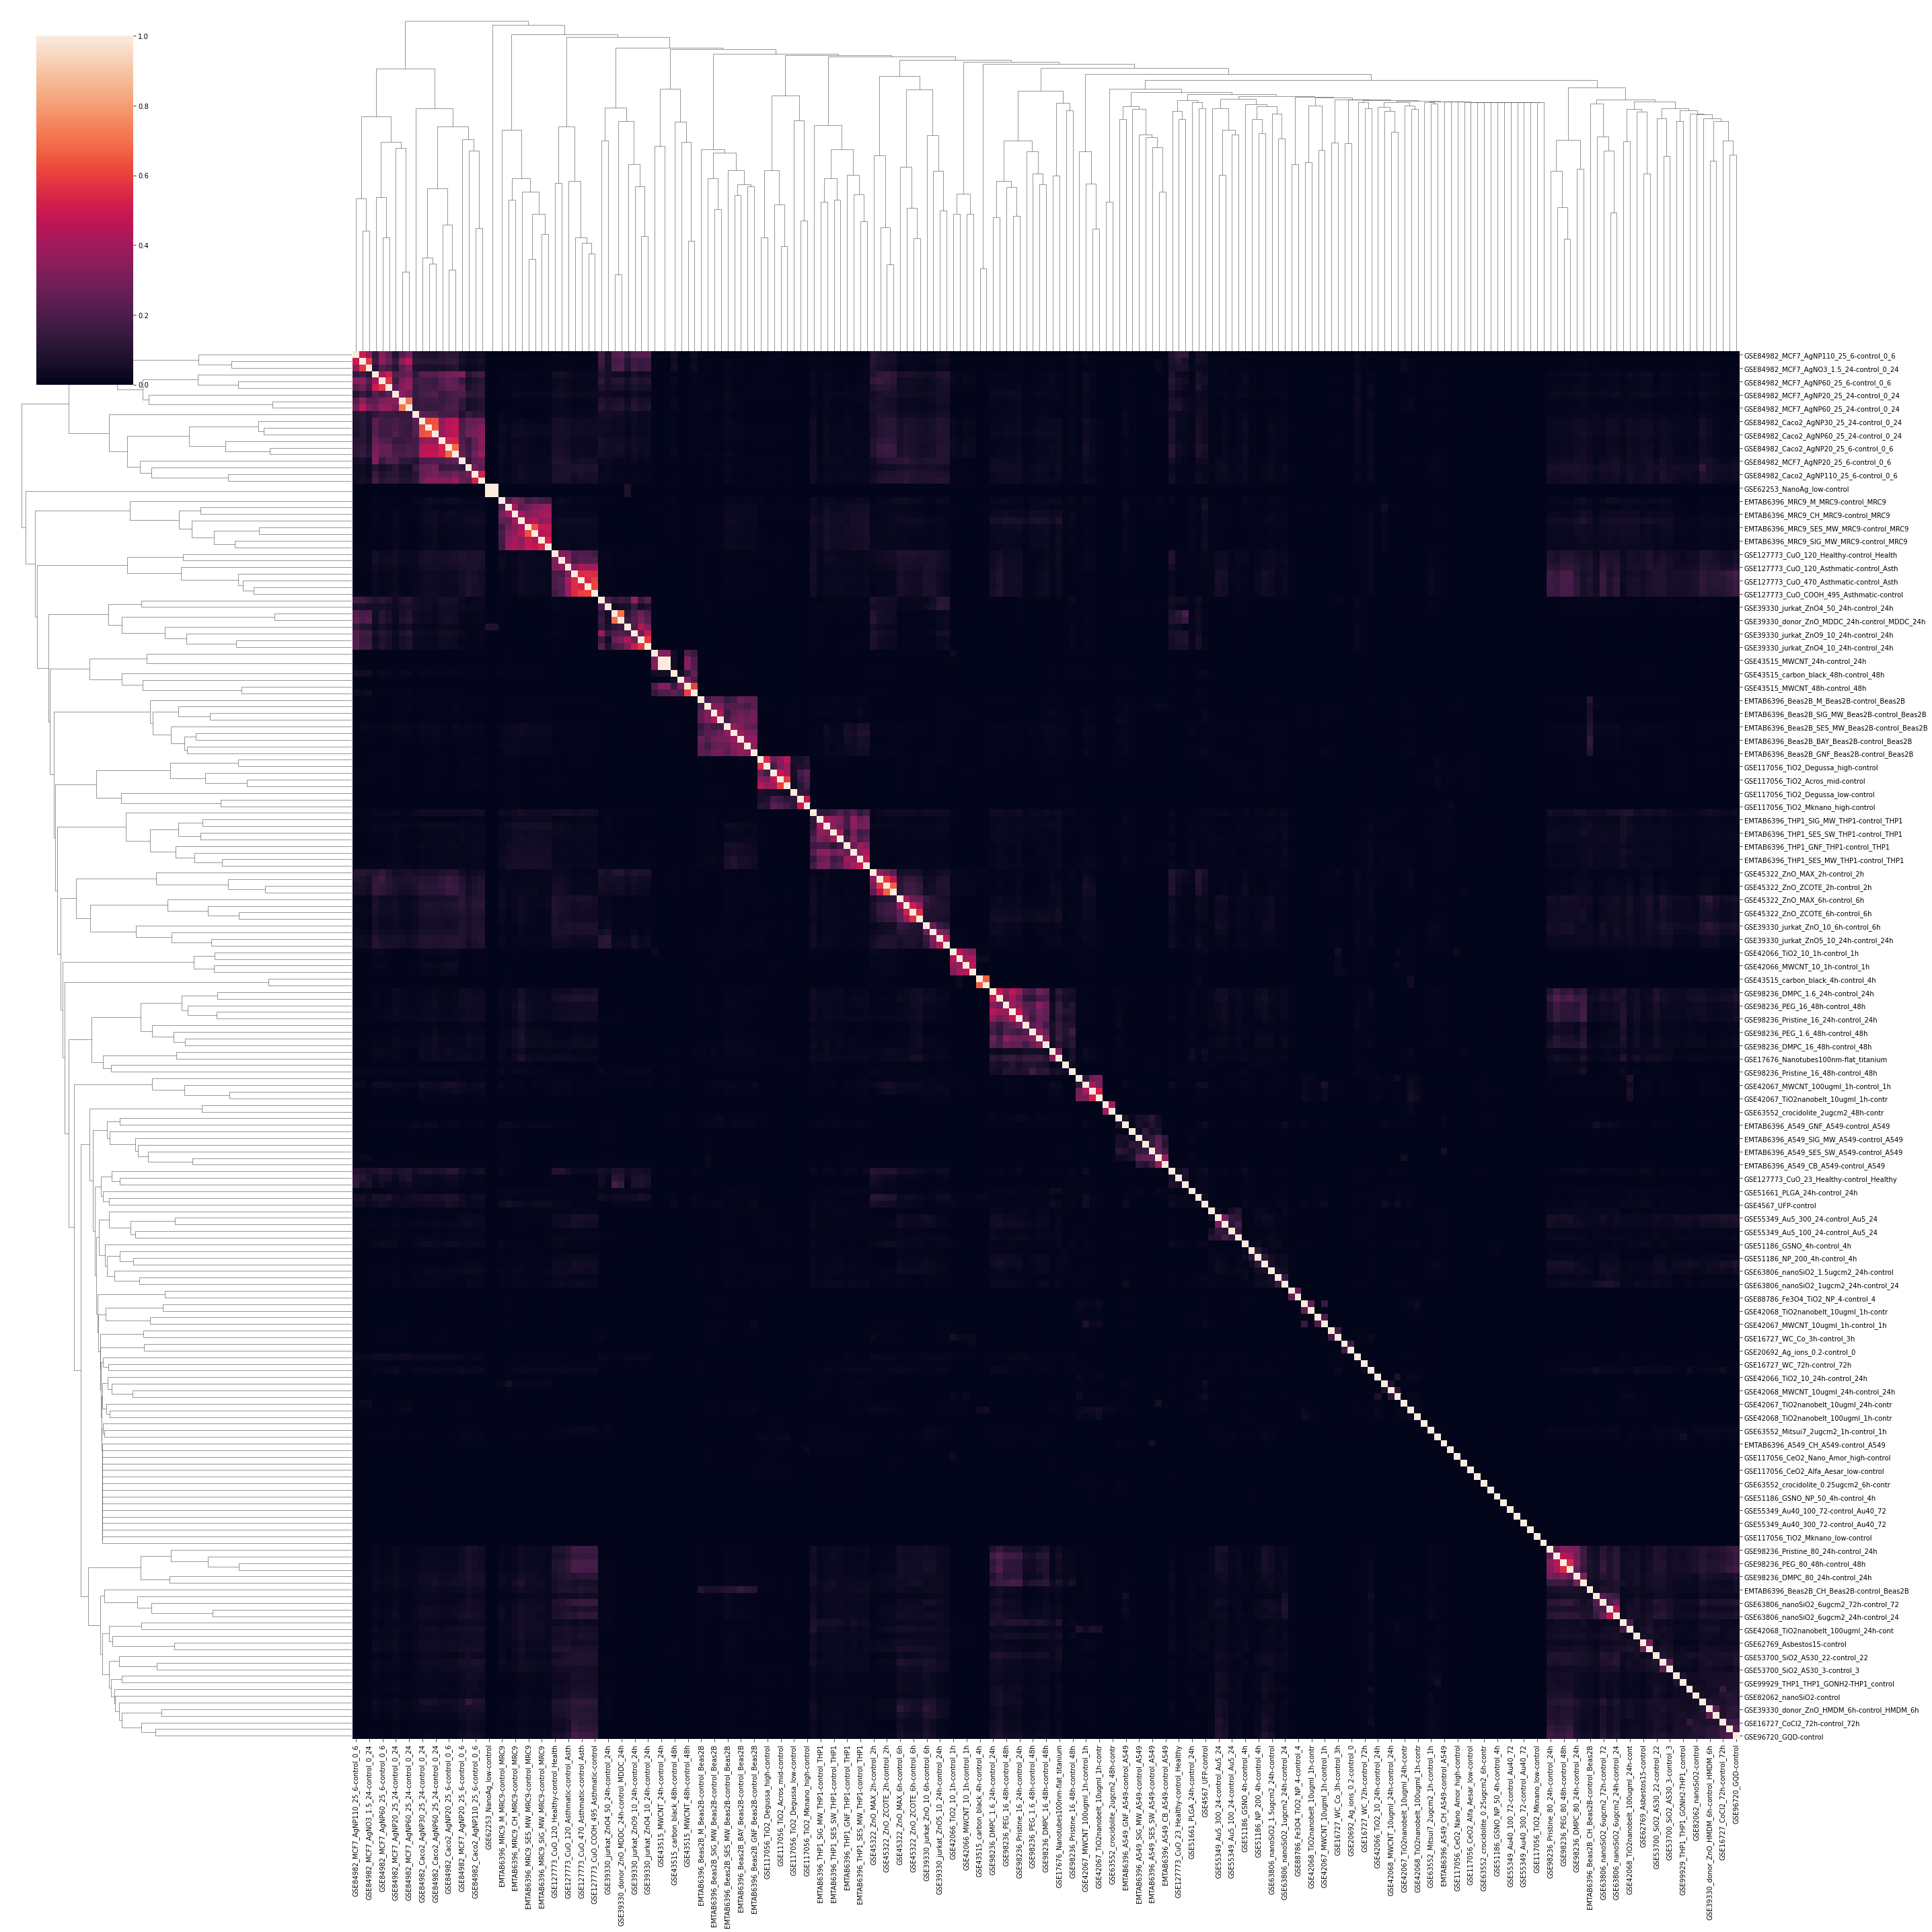

In [177]:
### Create a Heatmap for the Jaccard index
g = sns.clustermap(df_Jaccard_human,figsize=(40,40))

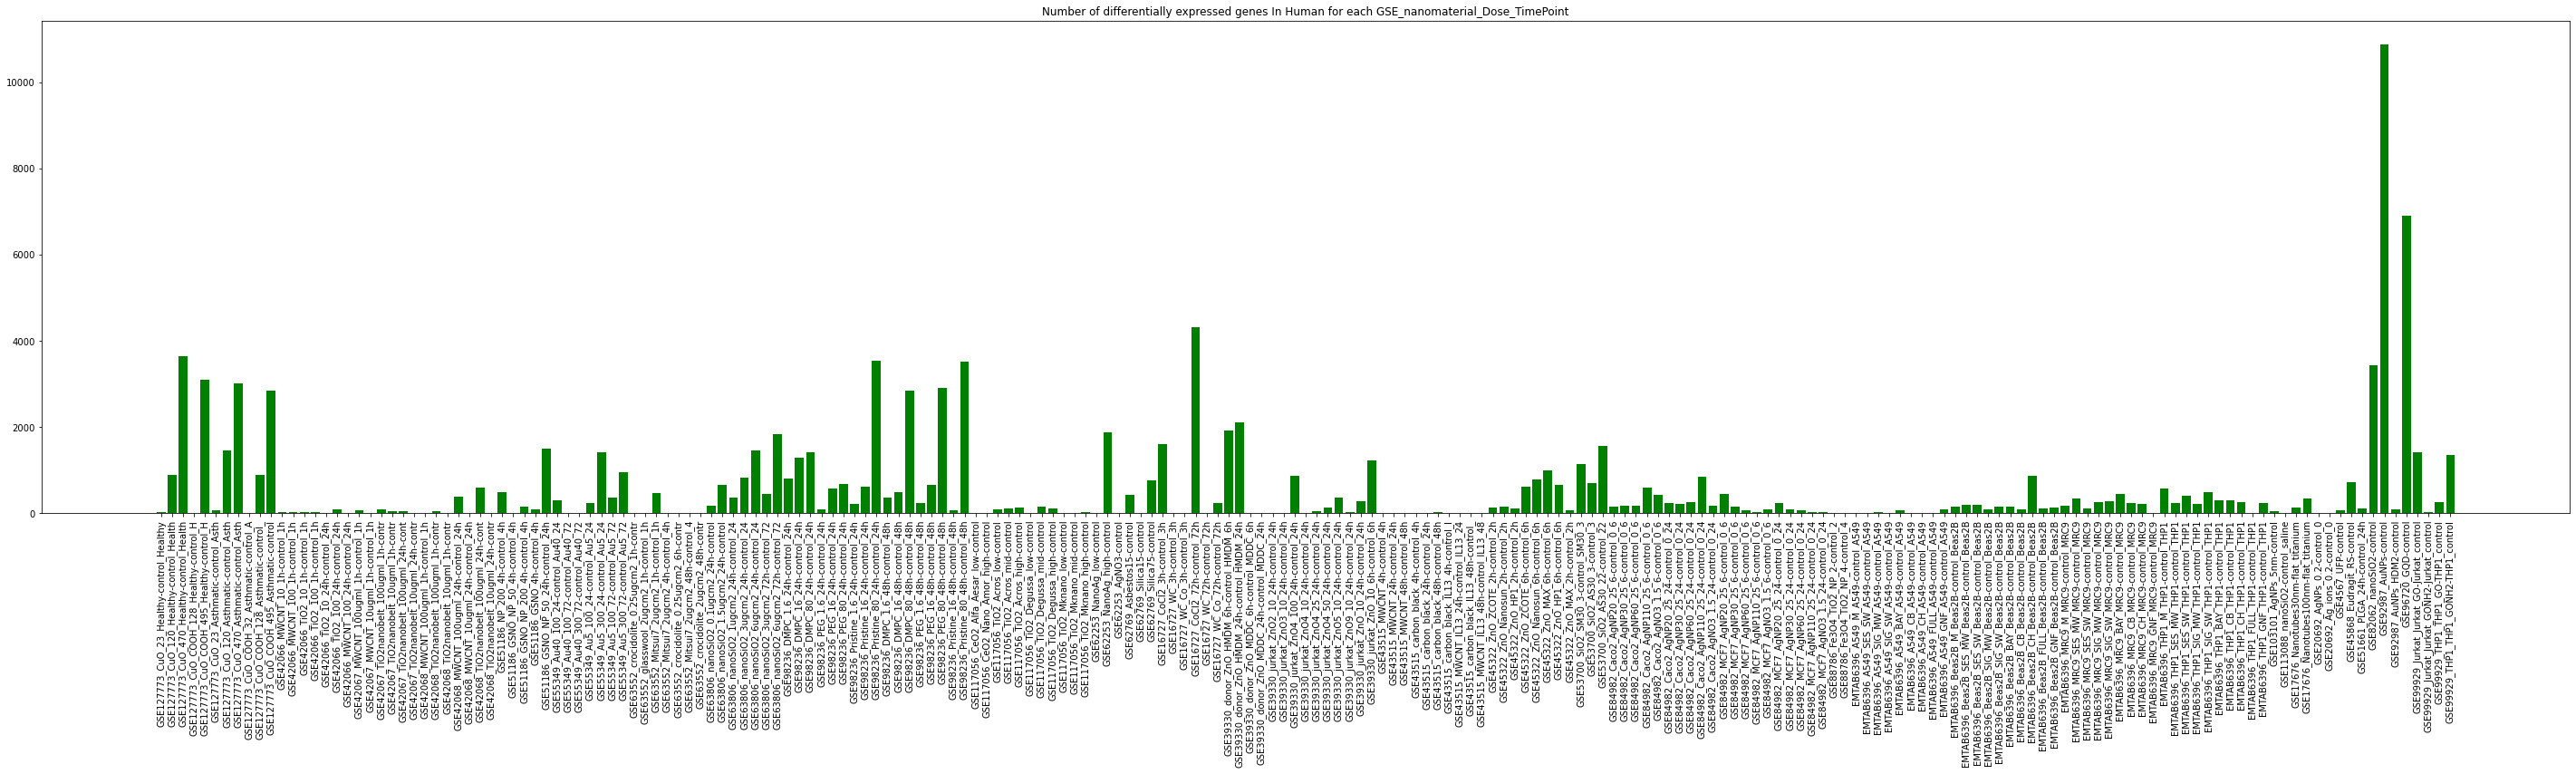

In [16]:
### Histogram of the number of genes for each GSE_nanomaterial_dose_time. 

fig, ax = plt.subplots(figsize = (50,10))
ax.bar(list(count_dif_genes_human.keys()), count_dif_genes_human.values(), color='g')

plt.xticks(rotation=90)
plt.title('Number of differentially expressed genes In Human for each GSE_nanomaterial_Dose_TimePoint')
plt.show()


Jaccard index Table only for mouse

In [18]:
###Call file_processing function for GSE_mouse file 
GSE_mouse = open('C:/Users/Gaia/Desktop/UNI/TIROCINIO/GSE_mouse.txt','r')
l_mouse = file_processing(GSE_mouse)

In [19]:
### 33 Mouse GSEs. 
len(l_mouse)

33

In [20]:
d_mouse, count_dif_genes_mouse = nano_gene(Microarray_rootdir,l_mouse)

Out of 33 GSEs, 30 have a Differentially expressed Table. 

In [21]:
len_d_mouse = len(d_mouse.keys())
#print(len_d)
keys_mouse = []
for key in d_mouse.keys():
    keys_mouse.append(key)

In [22]:
Zero_matrix_mouse = np.zeros((len_d_mouse,len_d_mouse))

Jaccard_matrix_mouse = similarity_matrix(Zero_matrix_mouse,d_mouse)

df_Jaccard_mouse = pd.DataFrame(Zero_matrix_mouse, index = keys_mouse,columns=keys_mouse)

In [23]:
df_Jaccard_mouse

,GSE112780_crocidolite_120ug_1mo-control_1,GSE112780_MWCNT_10ug_1mo-control_1mo,GSE112780_MWCNT_40ug_1mo-control_1mo,GSE112780_MWCNT_80ug_1mo-control_1mo,GSE112780_crocidolite_120ug_6mo-control_6,GSE112780_MWCNT_10ug_6mo-control_6mo,GSE112780_MWCNT_40ug_6mo-control_6mo,GSE112780_MWCNT_80ug_6mo-control_6mo,GSE112780_crocidolite_120ug_12mo-control_,GSE112780_MWCNT_40ug_12mo-control_12m,...,GSE92563_E171_2d-control_2d,GSE92563_E171_7d-control_7d,GSE92563_E171_14d-control_14d,GSE92563_E171_21d-control_21d,GSE92900_Baytube-control,GSE92900_fullerene-control,GSE92900_Graphite-control,GSE92900_rCNT-control,GSE92900_SES-control,GSE92900_tCNT-control
GSE112780_crocidolite_120ug_1mo-control_1,1.0000,0.0066,0.1367,0.2570,0.2334,0.0013,0.0433,0.1564,0.2510,0.0105,...,0.0000,0.0135,0.0308,0.0000,0.0735,0.0096,0.0307,0.0794,0.0000,0.0178
GSE112780_MWCNT_10ug_1mo-control_1mo,0.0066,1.0000,0.0455,0.0210,0.0133,0.2000,0.0976,0.0243,0.0049,0.1176,...,0.0000,0.0000,0.0000,0.0000,0.0018,0.0000,0.0000,0.0008,0.0000,0.0061
GSE112780_MWCNT_40ug_1mo-control_1mo,0.1367,0.0455,1.0000,0.4321,0.2150,0.0091,0.2295,0.3447,0.1111,0.0508,...,0.0000,0.0038,0.0054,0.0000,0.0518,0.0066,0.0064,0.0180,0.0000,0.0228
GSE112780_MWCNT_80ug_1mo-control_1mo,0.2570,0.0210,0.4321,1.0000,0.2792,0.0042,0.1440,0.3620,0.2023,0.0286,...,0.0000,0.0098,0.0147,0.0000,0.0857,0.0046,0.0125,0.0376,0.0000,0.0285
GSE112780_crocidolite_120ug_6mo-control_6,0.2334,0.0133,0.2150,0.2792,1.0000,0.0027,0.0919,0.3535,0.2683,0.0209,...,0.0000,0.0090,0.0100,0.0000,0.0759,0.0106,0.0183,0.0403,0.0000,0.0288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSE92900_fullerene-control,0.0096,0.0000,0.0066,0.0046,0.0106,0.0000,0.0043,0.0075,0.0100,0.0000,...,0.0000,0.0087,0.0116,0.0000,0.1218,1.0000,0.0779,0.0332,0.0305,0.1238
GSE92900_Graphite-control,0.0307,0.0000,0.0064,0.0125,0.0183,0.0000,0.0036,0.0110,0.0316,0.0012,...,0.0012,0.0607,0.0582,0.0000,0.1027,0.0779,1.0000,0.2363,0.0043,0.0450
GSE92900_rCNT-control,0.0794,0.0008,0.0180,0.0376,0.0403,0.0000,0.0073,0.0272,0.0705,0.0011,...,0.0006,0.0593,0.0747,0.0003,0.1126,0.0332,0.2363,1.0000,0.0006,0.0384
GSE92900_SES-control,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0006,0.0000,0.0143,0.0305,0.0043,0.0006,1.0000,0.0060


In [24]:
### Write excel file with dataframe
df_Jaccard_mouse.to_excel('C:/Users/Gaia/Desktop/UNI/TIROCINIO/Jaccard_mouse.xlsx')

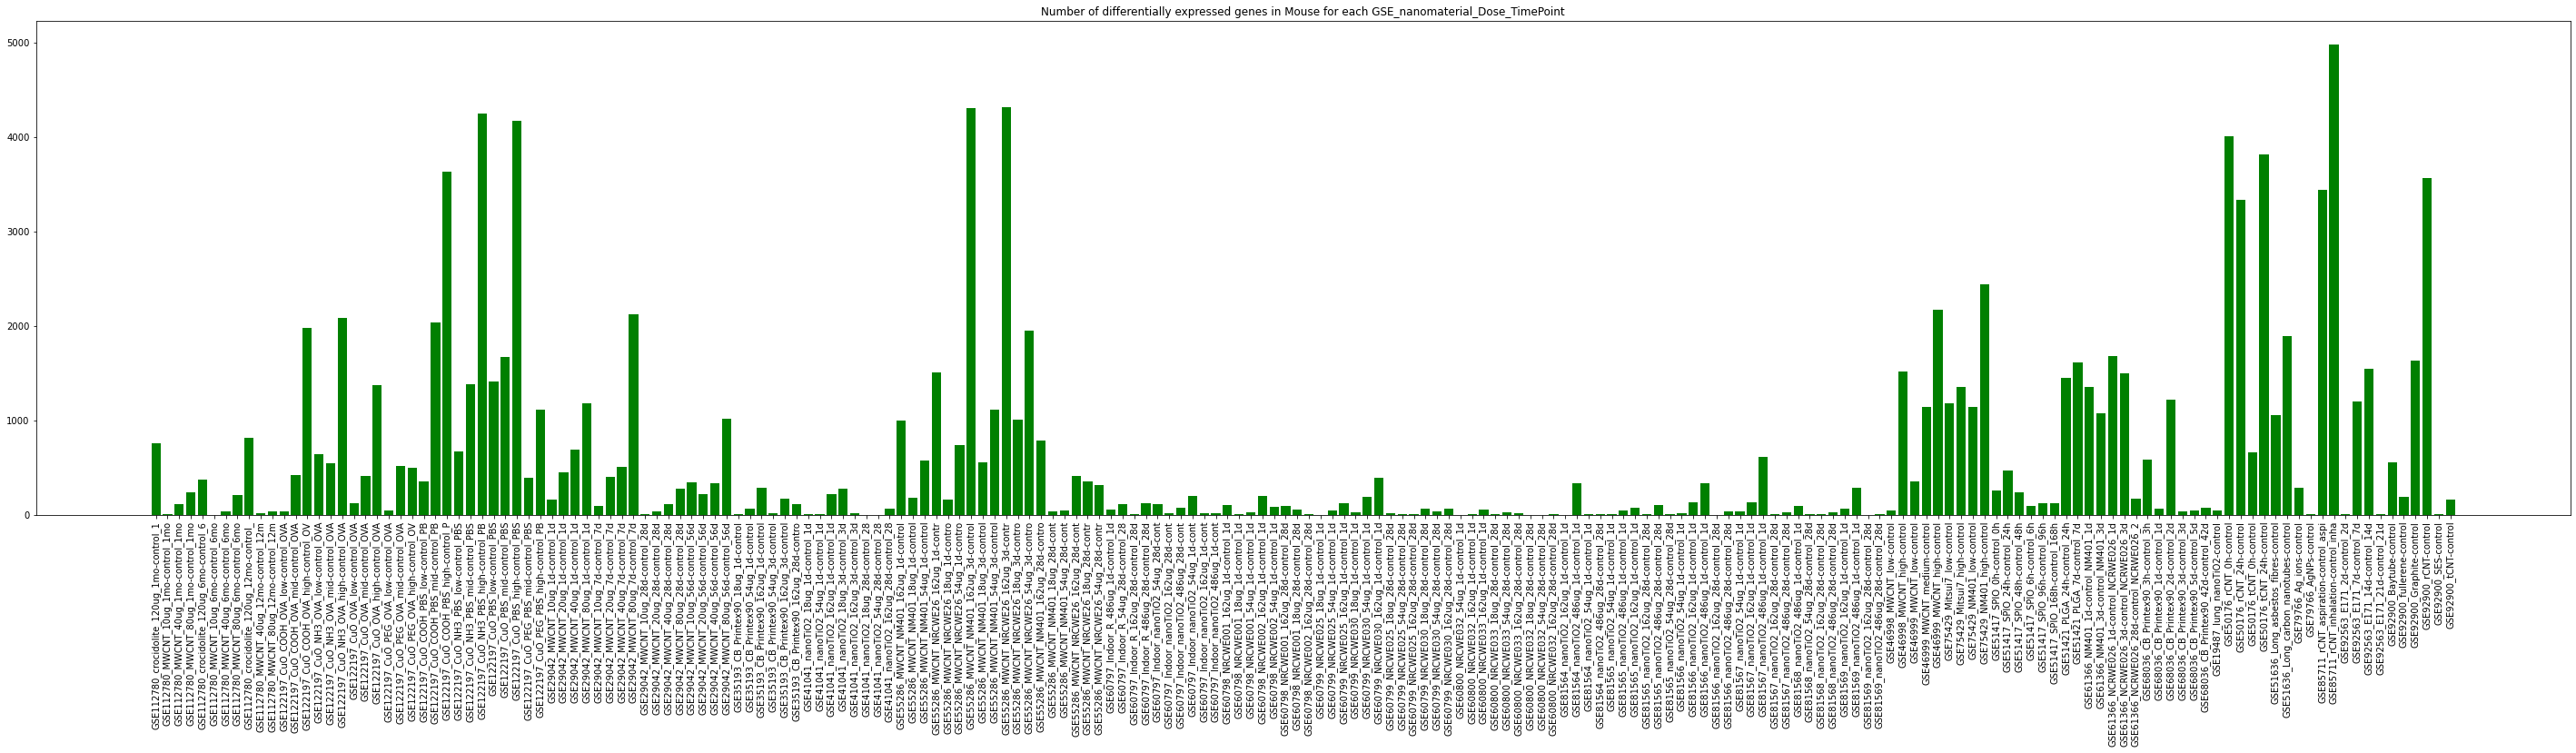

In [25]:
### Histogram of the number of genes for each GSE_nanomaterial_dose_time. 

fig, ax = plt.subplots(figsize = (50,10))
ax.bar(list(count_dif_genes_mouse.keys()), count_dif_genes_mouse.values(), color='g')

plt.xticks(rotation=90)
plt.title('Number of differentially expressed genes in Mouse for each GSE_nanomaterial_Dose_TimePoint')
plt.show()

Jaccard index for differentially expressed genes for which a 1:1 mapping human-mouse is available. (data_space tab)

In [26]:
### Upload data_space table as Pandas dataframe 
data_space = pd.read_csv('C:/Users/Gaia/Desktop/UNI/TIROCINIO/data_space.csv', sep = ';') 

In [27]:
data_space

,Genes,GSE112780_crocidolite_120ug_1mo-control_1_logFC,GSE112780_crocidolite_120ug_1mo-control_1_P.Value,GSE112780_crocidolite_120ug_1mo-control_1_adj.P.Val,GSE112780_MWCNT_1ug_1mo-control_1mo_logFC,GSE112780_MWCNT_1ug_1mo-control_1mo_P.Value,GSE112780_MWCNT_1ug_1mo-control_1mo_adj.P.Val,GSE112780_MWCNT_10ug_1mo-control_1mo_logFC,GSE112780_MWCNT_10ug_1mo-control_1mo_P.Value,GSE112780_MWCNT_10ug_1mo-control_1mo_adj.P.Val,...,GSE99929_Jurkat_Jurkat_GO-Jurkat_control_adj.P.Val,GSE99929_Jurkat_Jurkat_GONH2-Jurkat_control_logFC,GSE99929_Jurkat_Jurkat_GONH2-Jurkat_control_P.Value,GSE99929_Jurkat_Jurkat_GONH2-Jurkat_control_adj.P.Val,GSE99929_THP1_THP1_GO-THP1_control_logFC,GSE99929_THP1_THP1_GO-THP1_control_P.Value,GSE99929_THP1_THP1_GO-THP1_control_adj.P.Val,GSE99929_THP1_THP1_GONH2-THP1_control_logFC,GSE99929_THP1_THP1_GONH2-THP1_control_P.Value,GSE99929_THP1_THP1_GONH2-THP1_control_adj.P.Val
0,ENSG00000186141,0.129377,0.227359,0.632511,0.038586,0.671932,0.999935,0.060173,0.521190,0.999993,...,0.997533,0.126782,0.103192,0.412659,0.018692,0.809534,0.906428,0.157015,0.060148,0.118325
1,ENSG00000134250,-0.089927,0.292891,0.699926,0.074649,0.305615,0.999935,0.028171,0.706619,0.999993,...,0.000570,-0.110931,0.092924,0.392575,0.335438,0.000374,0.004955,-0.217906,0.008228,0.022453
2,ENSG00000143384,0.030705,0.724620,0.924116,0.012902,0.862094,0.999935,0.025958,0.734168,0.999993,...,0.109041,0.028958,0.660292,0.873065,-0.103993,0.331723,0.536455,0.270971,0.021403,0.050087
3,ENSG00000131791,-0.199536,0.075003,0.389509,-0.022765,0.810476,0.999935,0.024714,0.800266,0.999993,...,0.025642,-0.394620,0.000314,0.023206,-0.118810,0.172090,0.352066,-0.098901,0.250174,0.368797
4,ENSG00000023902,0.072309,0.587449,0.869652,-0.037498,0.741237,0.999935,-0.155610,0.184410,0.999993,...,0.000009,0.181389,0.046200,0.290490,-0.329328,0.001218,0.011202,0.261824,0.005933,0.017071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,ENSG00000165219,-0.020427,0.790866,0.942063,0.047756,0.467400,0.999935,-0.057129,0.398362,0.999993,...,0.844022,0.269165,0.003542,0.077861,0.136065,0.189088,0.373326,0.175482,0.097529,0.175405
3676,ENSG00000106077,0.198431,0.093230,0.430273,-0.069461,0.488541,0.999935,-0.013199,0.898132,0.999993,...,0.112344,-0.130118,0.046448,0.291078,-0.017066,0.842521,0.922461,0.088867,0.310929,0.436640
3677,ENSG00000160211,0.357998,0.232817,0.638173,-0.220650,0.387619,0.999935,0.218854,0.404924,0.999993,...,0.052503,0.033919,0.581200,0.835812,0.029607,0.709411,0.841650,-0.303001,0.001983,0.006813
3678,ENSG00000077721,0.257490,0.237405,0.643703,0.255975,0.168626,0.999935,-0.074992,0.694086,0.999993,...,0.014759,-0.093516,0.198558,0.551413,-0.153698,0.022292,0.088195,-0.036868,0.542562,0.661913


In [70]:
### Define a function that given a pandas dataframe (data_space) it returns a dictionary with key GSE_nanomaterial_dose_timepoint and 
### as values the list of Ensembl IDs differentially expressed mapped human_mouse.
def nano_gene_mouse_human(data_space):
    d_human_mouse = {}
    count_dif_genes = {}
    for i in range(1,data_space.shape[1]-2,3): 
        
        colname_logFC = data_space.columns[i] ### Name of the column based on the index. 
        colname_Adjusted_pvalue = data_space.columns[i+2]
        #print(i,colname_logFC,colname_Adjusted_pvalue)
        newdf = data_space[((data_space[colname_logFC] > 0.58) | (data_space[colname_logFC] < -0.58))
              & (data_space[colname_Adjusted_pvalue] < 0.05)]
        df = newdf['Genes'].values.tolist()    ### Retain only the Genes column and convert dataframe into list! 
        if df != []: ### Not including Nanomaterials for which no differentially expressed genes are present after filtering 
            df = set(df) ### Trasforming into a set 
            d_human_mouse[colname_logFC[:-6]] = df
            count_dif_genes[colname_logFC[:-6]] = len(df)
   
    return d_human_mouse,count_dif_genes

In [72]:
d_human_mouse, count_dif_human_mouse = nano_gene_mouse_human(data_space)

In [66]:
len_d_human_mouse = len(d_human_mouse.keys())
#print(len_d)
keys_human_mouse = []
for key in d_human_mouse.keys():
    keys_human_mouse.append(key)

In [67]:
Zero_matrix_human_mouse = np.zeros((len_d_human_mouse,len_d_human_mouse))

Jaccard_matrix_mouse = similarity_matrix(Zero_matrix_human_mouse,d_human_mouse)

df_Jaccard_human_mouse = pd.DataFrame(Zero_matrix_human_mouse, index= keys_human_mouse, columns= keys_human_mouse)

In [68]:
df_Jaccard_human_mouse

,GSE112780_crocidolite_120ug_1mo-control_1,GSE112780_MWCNT_40ug_1mo-control_1mo,GSE112780_MWCNT_80ug_1mo-control_1mo,GSE112780_crocidolite_120ug_6mo-control_6,GSE112780_MWCNT_80ug_6mo-control_6mo,GSE112780_crocidolite_120ug_12mo-control_,GSE122197_CuO_COOH_OVA_low-control_OVA,GSE122197_CuO_COOH_OVA_mid-control_OVA,GSE122197_CuO_COOH_OVA_high-control_OV,GSE122197_CuO_NH3_OVA_low-control_OVA,...,GSE92900_rCNT-control,GSE92900_SES-control,GSE92900_tCNT-control,GSE92987_AuNPs-control,GSE92987_AuNPs_HDM2-control,GSE96720_GQD-control,GSE99929_Jurkat_Jurkat_GO-Jurkat_control,GSE99929_Jurkat_Jurkat_GONH2-Jurkat_control,GSE99929_THP1_THP1_GO-THP1_control,GSE99929_THP1_THP1_GONH2-THP1_control
GSE112780_crocidolite_120ug_1mo-control_1,1.0000,0.0500,0.1000,0.1277,0.0488,0.2500,0.0000,0.0147,0.0269,0.0571,...,0.0233,0.0000,0.0000,0.0121,0.0159,0.0122,0.0135,0.0000,0.0000,0.0089
GSE112780_MWCNT_40ug_1mo-control_1mo,0.0500,1.0000,0.5000,0.1538,0.2500,0.0667,0.0000,0.0000,0.0000,0.0139,...,0.0028,0.0000,0.0000,0.0009,0.0000,0.0012,0.0000,0.0000,0.0000,0.0000
GSE112780_MWCNT_80ug_1mo-control_1mo,0.1000,0.5000,1.0000,0.3077,0.4000,0.1333,0.0000,0.0000,0.0000,0.0135,...,0.0042,0.0000,0.0000,0.0013,0.0000,0.0019,0.0000,0.0000,0.0000,0.0000
GSE112780_crocidolite_120ug_6mo-control_6,0.1277,0.1538,0.3077,1.0000,0.2308,0.1944,0.0000,0.0000,0.0169,0.0244,...,0.0098,0.0000,0.0000,0.0030,0.0000,0.0056,0.0048,0.0000,0.0000,0.0071
GSE112780_MWCNT_80ug_6mo-control_6mo,0.0488,0.2500,0.4000,0.2308,1.0000,0.0645,0.0000,0.0000,0.0044,0.0000,...,0.0028,0.0000,0.0000,0.0004,0.0000,0.0019,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSE96720_GQD-control,0.0122,0.0012,0.0019,0.0056,0.0019,0.0080,0.0006,0.0086,0.0617,0.0181,...,0.1664,0.0006,0.0043,0.3333,0.0105,1.0000,0.0853,0.0006,0.0162,0.1011
GSE99929_Jurkat_Jurkat_GO-Jurkat_control,0.0135,0.0000,0.0000,0.0048,0.0000,0.0092,0.0000,0.0046,0.0341,0.0234,...,0.0700,0.0024,0.0024,0.1019,0.0023,0.0853,1.0000,0.0097,0.0253,0.0945
GSE99929_Jurkat_Jurkat_GONH2-Jurkat_control,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0286,0.0043,0.0130,...,0.0014,0.0000,0.0000,0.0022,0.0000,0.0006,0.0097,1.0000,0.0000,0.0048
GSE99929_THP1_THP1_GO-THP1_control,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0294,0.0202,0.0068,...,0.0182,0.0000,0.0000,0.0207,0.0000,0.0162,0.0253,0.0000,1.0000,0.0450


In [69]:
### Write excel file with dataframe
df_Jaccard_human_mouse.to_excel('C:/Users/Gaia/Desktop/UNI/TIROCINIO/Jaccard_human_mouse.xlsx')

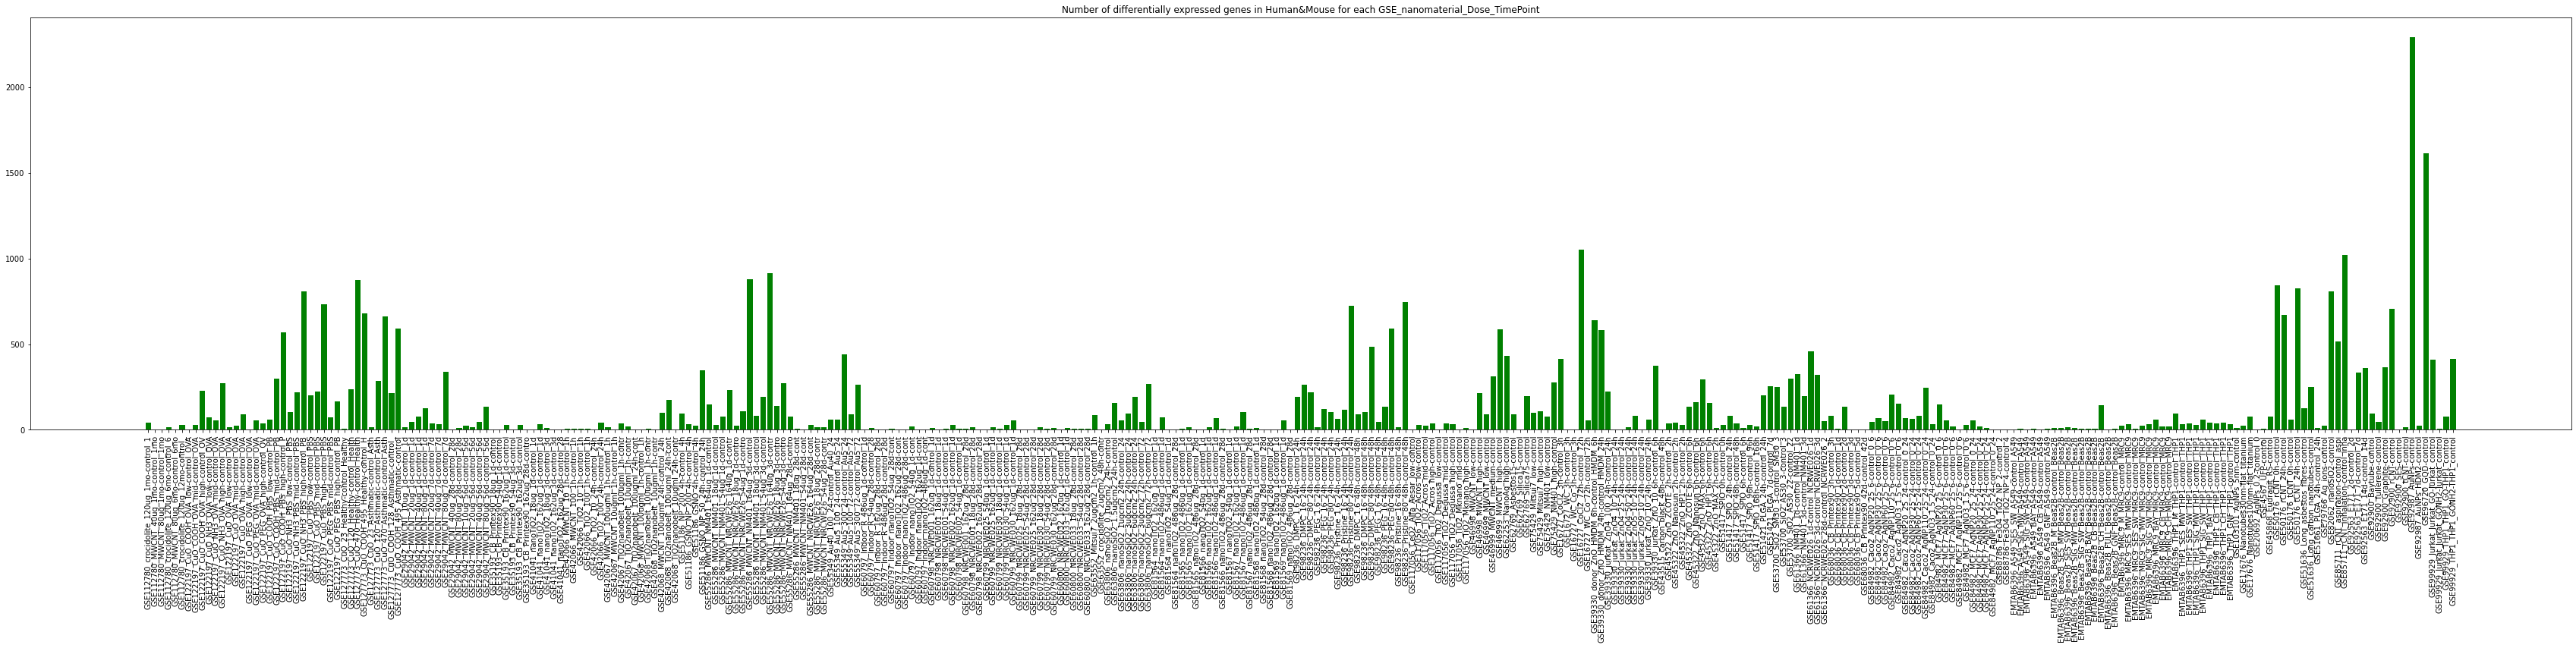

In [77]:
### Histogram of the number of genes for each GSE_nanomaterial_dose_time. 

fig, ax = plt.subplots(figsize = (60,10))
ax.bar(list(count_dif_human_mouse.keys()), count_dif_human_mouse.values(), color='g')

plt.xticks(rotation=90)
plt.title('Number of differentially expressed genes in Human&Mouse for each GSE_nanomaterial_Dose_TimePoint')
plt.show()

Kendal Tau similarity measure. 
1) Upload the csv file sorted in alphabetical order by Ensembl ID + removal of NA.11,NA.12,NA.13,NA.14 and convert it into pandas dataframe 
2) function that loops through all logFC columns, fills a dictionary with key the Nanomaterial and values the ranks
3) Calculate the Kendal Tau measure for each key of the dictionary and fill a matrix with module from scipy.  

In [69]:
### Upload data_space_sorted table as Pandas dataframe (The genes were sorted in alphabetical order)
#data_space_sorted = pd.read_csv('C:/Users/Gaia/Desktop/UNI/TIROCINIO/data_space_sorted.csv', sep = ';')
data_space_sorted = pd.read_csv('C:/Users/Gaia/Desktop/UNI/TIROCINIO/data_space_sorted.csv', sep = ';')

In [70]:
data_space_sorted

,Genes,GSE112780_crocidolite_120ug_1mo-control_1_logFC,GSE112780_crocidolite_120ug_1mo-control_1_P.Value,GSE112780_crocidolite_120ug_1mo-control_1_adj.P.Val,GSE112780_MWCNT_1ug_1mo-control_1mo_logFC,GSE112780_MWCNT_1ug_1mo-control_1mo_P.Value,GSE112780_MWCNT_1ug_1mo-control_1mo_adj.P.Val,GSE112780_MWCNT_10ug_1mo-control_1mo_logFC,GSE112780_MWCNT_10ug_1mo-control_1mo_P.Value,GSE112780_MWCNT_10ug_1mo-control_1mo_adj.P.Val,...,GSE99929_Jurkat_Jurkat_GO-Jurkat_control_adj.P.Val,GSE99929_Jurkat_Jurkat_GONH2-Jurkat_control_logFC,GSE99929_Jurkat_Jurkat_GONH2-Jurkat_control_P.Value,GSE99929_Jurkat_Jurkat_GONH2-Jurkat_control_adj.P.Val,GSE99929_THP1_THP1_GO-THP1_control_logFC,GSE99929_THP1_THP1_GO-THP1_control_P.Value,GSE99929_THP1_THP1_GO-THP1_control_adj.P.Val,GSE99929_THP1_THP1_GONH2-THP1_control_logFC,GSE99929_THP1_THP1_GONH2-THP1_control_P.Value,GSE99929_THP1_THP1_GONH2-THP1_control_adj.P.Val
0,ENSG00000000457,-0.0976867,0.371390155994148,0.757315420800676,0.0332305,0.720921,0.999935,0.0191438,0.841455,0.999993,...,0.69224848714226,0.0157108640305381,0.795691920274067,0.928173,0.122443,0.134409663252948,0.300028109740766,0.0664720466753241,0.401096094119047,0.529424686782294
1,ENSG00000000460,0.133923,0.487847590496168,0.82571321532482,-0.00250134,0.987859,0.999935,-0.0317657,0.851047,0.999993,...,0.766259639054679,-0.141517440212363,0.125953085591571,0.451165,-0.071867,0.452030520172596,0.649585018902331,107.909.183.135.206,"4,85E+06","2,16E+08"
2,ENSG00000001167,-0.128364,0.263229145875559,0.670489333833972,-0.0524669,0.590893,0.999935,-0.190143,0.059989,0.999993,...,0.757127069629698,0.106526807983617,0.140671171423352,0.475442,-0.0580258,0.530373345893523,0.715298065315168,0.494571230557293,0.000121304824621357,0.000661238133831914
3,ENSG00000001461,-0.405328,0.00011322901999147,0.00497625669635409,0.0235143,0.786581,0.999935,-0.112481,0.209523,0.999993,...,"3,70E+07",0.129664852089908,0.0413028525332597,0.277895,0.0825325,0.259055108425091,0.458220703042469,-0.111296770117939,0.135861300399021,0.228333630381997
4,ENSG00000001497,-0.100741,0.459672559398813,0.809187750401642,0.0221234,0.848763,0.999935,0.0147194,0.901863,0.999993,...,0.00150405383880973,0.0555155254664204,0.402482376876091,0.732723,-0.119441,0.195625676568756,0.381862901468527,0.346357574378603,0.00176222311342473,0.00618828441147222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3671,ENSG00000245848,0.404602,0.0126948535487832,0.144571,0.0437398,0.748963,0.999935,0.0823003,0.558632,0.999993,...,0.000829016847211105,0.0086437,0.884747,0.964128,-0.446666,0.00247568258650914,0.0186372578792142,129.581.396.301.111,"9,67E+05","3,30E+08"
3672,ENSG00000253729,-0.0926929,0.348257920171095,0.739708,0.0314344,0.708593,0.999935,-0.0418725,0.628574,0.999993,...,0.876917892455913,0.0550492,0.325518,0.680523,0.207144,0.00621743575231218,0.0355507250360816,-0.0481638418275585,0.458653335353835,0.585452988667016
3673,ENSG00000255302,-0.0490196,0.766023682278764,0.935974,0.0130327,0.926033,0.999935,0.0339963,0.813957,0.999993,...,0.0158922980370352,-0.0971965,0.150361,0.488364,0.0211967,0.868286965586509,0.936397982191454,-0.120700920477061,0.35344262114741,0.480467796435105
3674,ENSG00000256525,-0.0924114,0.549769211360518,0.852934,-0.117034,0.374586,0.999935,-0.237844,0.080864,0.999993,...,0.244626364584437,-0.117308,0.134433,0.464661,0.019888,0.77675593345991,0.885284090316179,0.287080828286017,0.00118731878489178,0.00441691830811673


In [71]:
### Check the presence of NaN values  
data_space_sorted.isnull().values.any()




False

In [72]:
### Convert the Genes column into row names
data_space_sorted = data_space_sorted.set_index('Genes') 

In [73]:
data_space_sorted

,GSE112780_crocidolite_120ug_1mo-control_1_logFC,GSE112780_crocidolite_120ug_1mo-control_1_P.Value,GSE112780_crocidolite_120ug_1mo-control_1_adj.P.Val,GSE112780_MWCNT_1ug_1mo-control_1mo_logFC,GSE112780_MWCNT_1ug_1mo-control_1mo_P.Value,GSE112780_MWCNT_1ug_1mo-control_1mo_adj.P.Val,GSE112780_MWCNT_10ug_1mo-control_1mo_logFC,GSE112780_MWCNT_10ug_1mo-control_1mo_P.Value,GSE112780_MWCNT_10ug_1mo-control_1mo_adj.P.Val,GSE112780_MWCNT_40ug_1mo-control_1mo_logFC,...,GSE99929_Jurkat_Jurkat_GO-Jurkat_control_adj.P.Val,GSE99929_Jurkat_Jurkat_GONH2-Jurkat_control_logFC,GSE99929_Jurkat_Jurkat_GONH2-Jurkat_control_P.Value,GSE99929_Jurkat_Jurkat_GONH2-Jurkat_control_adj.P.Val,GSE99929_THP1_THP1_GO-THP1_control_logFC,GSE99929_THP1_THP1_GO-THP1_control_P.Value,GSE99929_THP1_THP1_GO-THP1_control_adj.P.Val,GSE99929_THP1_THP1_GONH2-THP1_control_logFC,GSE99929_THP1_THP1_GONH2-THP1_control_P.Value,GSE99929_THP1_THP1_GONH2-THP1_control_adj.P.Val
Genes,,,,,,,,,,,,,,,,,,,,,
ENSG00000000457,-0.0976867,0.371390155994148,0.757315420800676,0.0332305,0.720921,0.999935,0.0191438,0.841455,0.999993,0.0918057317106165,...,0.69224848714226,0.0157108640305381,0.795691920274067,0.928173,0.122443,0.134409663252948,0.300028109740766,0.0664720466753241,0.401096094119047,0.529424686782294
ENSG00000000460,0.133923,0.487847590496168,0.82571321532482,-0.00250134,0.987859,0.999935,-0.0317657,0.851047,0.999993,0.073366113956741,...,0.766259639054679,-0.141517440212363,0.125953085591571,0.451165,-0.071867,0.452030520172596,0.649585018902331,107.909.183.135.206,"4,85E+06","2,16E+08"
ENSG00000001167,-0.128364,0.263229145875559,0.670489333833972,-0.0524669,0.590893,0.999935,-0.190143,0.059989,0.999993,-0.145188786187478,...,0.757127069629698,0.106526807983617,0.140671171423352,0.475442,-0.0580258,0.530373345893523,0.715298065315168,0.494571230557293,0.000121304824621357,0.000661238133831914
ENSG00000001461,-0.405328,0.00011322901999147,0.00497625669635409,0.0235143,0.786581,0.999935,-0.112481,0.209523,0.999993,-0.113959941086051,...,"3,70E+07",0.129664852089908,0.0413028525332597,0.277895,0.0825325,0.259055108425091,0.458220703042469,-0.111296770117939,0.135861300399021,0.228333630381997
ENSG00000001497,-0.100741,0.459672559398813,0.809187750401642,0.0221234,0.848763,0.999935,0.0147194,0.901863,0.999993,-0.0666589928110914,...,0.00150405383880973,0.0555155254664204,0.402482376876091,0.732723,-0.119441,0.195625676568756,0.381862901468527,0.346357574378603,0.00176222311342473,0.00618828441147222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000245848,0.404602,0.0126948535487832,0.144571,0.0437398,0.748963,0.999935,0.0823003,0.558632,0.999993,0.241585,...,0.000829016847211105,0.0086437,0.884747,0.964128,-0.446666,0.00247568258650914,0.0186372578792142,129.581.396.301.111,"9,67E+05","3,30E+08"
ENSG00000253729,-0.0926929,0.348257920171095,0.739708,0.0314344,0.708593,0.999935,-0.0418725,0.628574,0.999993,0.00568435,...,0.876917892455913,0.0550492,0.325518,0.680523,0.207144,0.00621743575231218,0.0355507250360816,-0.0481638418275585,0.458653335353835,0.585452988667016
ENSG00000255302,-0.0490196,0.766023682278764,0.935974,0.0130327,0.926033,0.999935,0.0339963,0.813957,0.999993,-0.0534692,...,0.0158922980370352,-0.0971965,0.150361,0.488364,0.0211967,0.868286965586509,0.936397982191454,-0.120700920477061,0.35344262114741,0.480467796435105


In [75]:
di = {}
for i in range(0,10,3): 
    colname_logFC = data_space_sorted.columns[i]
    print(colname_logFC)
    di[colname_logFC] = data_space_sorted[colname_logFC].rank().values.tolist()
    print(data_space_sorted[colname_logFC].rank().values.tolist())

GSE112780_crocidolite_120ug_1mo-control_1_logFC
[]
GSE112780_MWCNT_1ug_1mo-control_1mo_logFC
[]
GSE112780_MWCNT_10ug_1mo-control_1mo_logFC
[]
GSE112780_MWCNT_40ug_1mo-control_1mo_logFC
[]


In [76]:
#data_space_sorted['ENSG00000137824']
#data_space_sorted.loc[ 'ENSG00000137824' , : ]
data_space_sorted['GSE112780_crocidolite_120ug_1mo-control_1_logFC'].dtype

dtype('O')

COSE DA FARE:
 
2)key di human_mouse sono di più rispetto a quelle solo human o solo mouse
3) mettere a posto istogrammi: mettere barre in orizzontale, riordina in ordine crescente, mettere barre che definiscono alto,medio,basso
4)colorare heatmap (non ordinata) in base a in vivo/in vitro/ex vivo, core material, biological system, cell line, time-period, geometry (es per in vivo/in vitro/ex vivo abbiamo labels colorate con 3 colori) + mettere legenda 
5) guardare pickle library per salvare oggetti e mettere su github 
6) colorare labels heatmap in base a categorie geni (alto, medio,basso)
7) guardare quanto cambia il clustering della heatmap riordinata con diversi metodi di clustering (single linkage etc)
8) fare pie chart con key nanomaterial (es MWCNT, senza dose e tempo) = lista geni (gene = numero volte che è differenzialmente espresso in tutti i campioni con quel nanomateriale 
9) fare confounding plot su tabella giusy per vedere quanto le diverse variabili sono correlate (probabilmente da fare su R) 
10) apripre file giusy e controllare che ci siano tutte le chiavi nel mio dizionario. 

PROBLEMI: 
    1) Rank non funziona. Probabilmente perchè ci sono dei dati che dovrebbero essere numeri ma sono probabilmente delle stringhe. 